# Mass-Spring-Damper System: Postprocessing the DeepONet

In [1]:
### Importing Libraries

import sys
print(sys.version)
import os
import time


### Defining WORKSPACE_PATH

# WORKSPACE_PATH = os.environ['WORKSPACE_PATH']
WORKSPACE_PATH = os.path.join(os.getcwd(), '../../../../../../')
ROMNet_fld     = os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/')

### Importing External Libraries

import numpy                             as np
import pandas                            as pd


### Importing Matplotlib and Its Style

import matplotlib.pyplot                 as plt

#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/presentation.mplstyle'))
#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/zoomed.mplstyle'))
#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/paper_1column.mplstyle'))
#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/paper_2columns.mplstyle'))


from scipy.integrate import solve_ivp
import pyDOE
from PCAfold         import PCA          as PCAA


import romnet                            as rmnt

3.9.12 (main, Mar 26 2022, 15:51:13) 
[Clang 12.0.0 (clang-1200.0.32.29)]


Missing colon in file PosixPath('/Users/sventur/.matplotlib/stylelib/paper_2columns.mplstyle'), line 1 ('f#### MATPLOTLIBRC FORMAT')


## Defining Input Data

In [2]:
# path_to_run_fld = os.path.join(WORKSPACE_PATH, 'ROMNet/Rect_50Instants_Rot/DeepONet/Run_2/')
# RotFlg      = True
# TransFlg    = False
# ScaleFlg    = False

# path_to_run_fld = os.path.join(WORKSPACE_PATH, 'ROMNet/Rect_50Instants_Trans/DeepONet/Run_1/')
# RotFlg      = False
# TransFlg    = True
# ScaleFlg    = False

# path_to_run_fld = os.path.join(WORKSPACE_PATH, 'ROMNet/Rect_50Instants_RotTrans/DeepONet/Run_1/')
# RotFlg      = True
# TransFlg    = True
# ScaleFlg    = False

path_to_run_fld = os.path.join(WORKSPACE_PATH, 'ROMNet/Rect_200Instants_TransRotScale_Empty_Rand/DeepONet/Run_2/')
RotFlg      = True
TransFlg    = True
ScaleFlg    = True

FigDir          = os.path.join(WORKSPACE_PATH, '../Desktop/Paper_Figures_DeepONet_TEMP/')


TrainingCases   = [0]#[0,2,4,6,8]
TestCases       = [0,2,4]#[0,2]

NSamples        = 1

LineVec         = ['-',':','--','.-']*10
ColorVec        = ['#190707', '#dd3232', '#0065a9', '#348a00','#985396','#f68b69']

In [3]:
Theta0  = 0./180*np.pi
w_Theta = 36./180*np.pi

w_Psi = 50./180*np.pi
ca    = 0.5
cx0   = 1.
cy0   = -0.5

lx0   = 3.
ly0   = 2.

xMin    = -10.
xMax    = 10.
yMin    = -10.
yMax    = 10.

v_zz  = 0.2
zz0   = 1.

## Loading ROMNet's Input Data File

In [4]:
print("\n[ROMNet]: Reading Input File from: ", path_to_run_fld)
sys.path.insert(0, path_to_run_fld)

print("\n[ROMNet]: Keep Loading Modules and Functions...")
from ROMNet_Input import inputdata

print("\n[ROMNet]: Initializing Input ...")
InputData               = inputdata(WORKSPACE_PATH)


InputData.InputFilePath = path_to_run_fld+'/ROMNet_Input.py'
InputData.train_int_flg = 0
InputData.path_to_run_fld  = path_to_run_fld


[ROMNet]: Reading Input File from:  /Users/sventur/WORKSPACE/ROMNet/romnet/scripts/postprocessing/Rect/DeepONet/../../../../../../ROMNet/Rect_200Instants_TransRotScale_Empty_Rand/DeepONet/Run_2/

[ROMNet]: Keep Loading Modules and Functions...

[ROMNet]: Initializing Input ...


## Loading Tensorflow's Model for the Network 

In [5]:
surrogate_type = InputData.surrogate_type
if (surrogate_type == 'FNN-SourceTerms'):
    surrogate_type = 'FNN'

Net   = getattr(rmnt.nn, surrogate_type)

model = rmnt.model.Model_TF(InputData)

if (InputData.phys_system is not None):
    System = getattr(rmnt.pinn.system, InputData.phys_system)
    system = System(InputData)
    
model.build(InputData, None, Net, system)#, loadfile_no='000027')

NN    = model.net


[ROMNet - model_tf.py    ]:   Initializing the ML Model

[ROMNet - model_tf.py    ]:   Building the ML Model

[ROMNet - deeponet.py               ]:   Constructing Deep Operator Network: 
[ROMNet - system_of_components.py   ]:     Mapping Branch-to-Trunk (i.e., self.branch_to_trunk Object):  [0]
[ROMNet - system_of_components.py   ]:     Constructing System of Components: DeepONet
[ROMNet - component.py              ]:       Constructing Component: Branch
[ROMNet - sub_component.py          ]:         Constructed Sub-Component: Main with Layers:       ListWrapper([<keras.layers.core.dense.Dense object at 0x163ab9ac0>, <keras.layers.core.dropout.Dropout object at 0x163ab91c0>, <keras.layers.core.dense.Dense object at 0x163ab7eb0>, <keras.layers.core.dropout.Dropout object at 0x163ab7340>, <keras.layers.core.dense.Dense object at 0x163ab7d60>])
[ROMNet - component.py              ]:       Constructing Component: Rigid
[ROMNet - sub_component.py          ]:         Constructed Sub-Compon

## Evaluating DeepONet on Test Data

In [6]:
input_vars  = model.net.input_vars
trunk_vars  = InputData.input_vars['DeepONet']['Trunk']
branch_vars = InputData.input_vars['DeepONet']['Branch']

t= 4.5
t= 4.75
t= 5.0
t= 5.25
t= 5.5


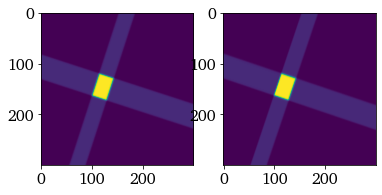

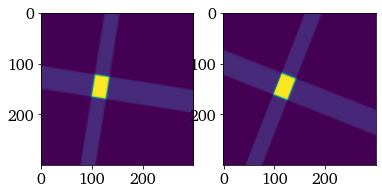

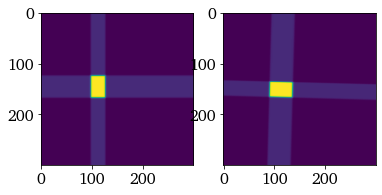

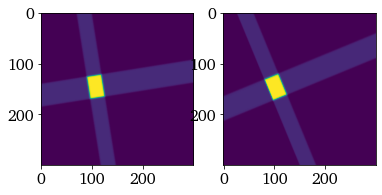

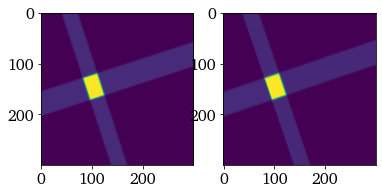

In [18]:
Nx   = 300
Ny   = 300

t0      = 4.5
tEnd    = 5.5
Nt      = 5
    
tVec    = np.linspace(t0,tEnd,Nt)
for it, t in enumerate(tVec):
    print('t=',t)
    
    fig, (ax1, ax2) = plt.subplots(1,2)
 
    if (RotFlg == True):
        Theta = Theta0 + w_Theta*t
    else:
        Theta = Theta0
        
    if (TransFlg == True):
        Psi   = t*w_Psi
        cr    = ca * Psi
        cx    = cx0 + cr * np.cos(Psi)
        cy    = cy0 + cr * np.sin(Psi)  
    else:
        cx    = 0.
        cy    = 0.
        
    if (ScaleFlg == True):
        lx    = (np.cos(t/10.*360. / 180.*np.pi)+2.)*lx0
        ly    = (np.cos(t/10.*360. / 180.*np.pi)+2.)*ly0
    else:
        lx    = lx0*2 
        ly    = ly0*2 
    
    zz    = zz0 + t*v_zz

    
    Mat       = np.zeros((Nx,Ny))
    InputPred = np.zeros((Nx*Ny,3))
    
    x    = np.linspace(xMin,xMax,Nx)
    y    = np.linspace(yMin,yMax,Ny)

    i    = 0
    for ix, x_ in enumerate(x):
        for iy, y_ in enumerate(y):
            xrot_      = x_*np.cos(Theta) + y_*np.sin(Theta)
            yrot_      = x_*np.sin(Theta) - y_*np.cos(Theta)

            zx         = np.tanh((xrot_-cx+lx/2)*10.) - np.tanh((xrot_-cx-lx/2)*10.)
            zy         = np.tanh((yrot_-cy+ly/2)*10.) - np.tanh((yrot_-cy-ly/2)*10.)  
            
            Mat[ix,iy] = np.exp(zx+zy)*zz
            
            InputPred[i,0] = t
            InputPred[i,1] = x_
            InputPred[i,2] = y_

            i+=1
            
    InputPred = pd.DataFrame(InputPred, columns=['t','x','y'])
    yMat      = model.predict(InputPred)

    ax1.imshow(Mat)
    ax2.imshow(yMat.reshape(Nx,Ny))

t= 0.0
t= 3.3333333333333335
t= 6.666666666666667
t= 10.0


<Figure size 432x288 with 0 Axes>

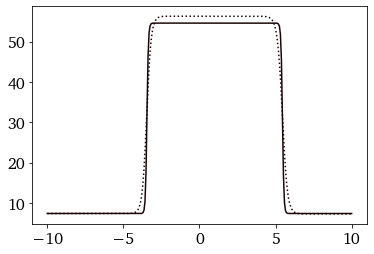

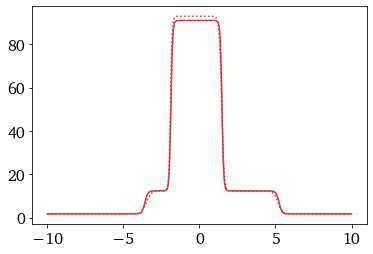

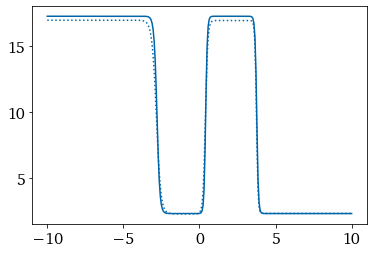

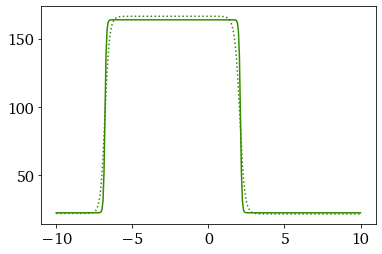

In [8]:
Nx   = 300
Ny   = 300


plt.figure()

tVec = np.linspace(0,10,4)
for it, t in enumerate(tVec):
    print('t=', t)
    
    if (RotFlg == True):
        Theta = Theta0 + w_Theta*t
    else:
        Theta = Theta0
        
    if (TransFlg == True):
        Psi   = t*w_Psi
        cr    = ca * Psi
        cx    = cx0 + cr * np.cos(Psi)
        cy    = cy0 + cr * np.sin(Psi)  
    else:
        cx    = 0.
        cy    = 0.
        
    if (ScaleFlg == True):
        lx    = (np.cos(t/10.*360. / 180.*np.pi)+2.)*lx0
        ly    = (np.cos(t/10.*360. / 180.*np.pi)+2.)*ly0
    else:
        lx    = lx0*2 
        ly    = ly0*2 
    
    zz    = zz0 + t*v_zz

    
    InputPred = np.zeros((Nx,3))
    yData     = np.zeros(Nx)
    x  = np.linspace(-10,10,Nx)
    y_ = 0.
    i  = 0
    for ix, x_ in enumerate(x):
        InputPred[i,0] = t
        InputPred[i,1] = x_
        InputPred[i,2] = y_
        xrot_          = x_*np.cos(Theta) + y_*np.sin(Theta)
        yrot_          = x_*np.sin(Theta) - y_*np.cos(Theta)
        
        zx         = np.tanh((xrot_-cx+lx/2)*10.) - np.tanh((xrot_-cx-lx/2)*10.)
        zy         = np.tanh((yrot_-cy+ly/2)*10.) - np.tanh((yrot_-cy-ly/2)*10.)  
            
        yData[i]   = np.exp(zx+zy)*zz
            
        i+=1
            
    InputPred = pd.DataFrame(InputPred, columns=['t','x','y'])
    
    yMat = model.predict(InputPred)
    
    plt.figure()
    plt.plot(x, yData, color=ColorVec[it])
    plt.plot(x, yMat, ':', color=ColorVec[it])

t= 0.0
t= 0.5263157894736842
t= 1.0526315789473684
t= 1.5789473684210527
t= 2.1052631578947367
t= 2.631578947368421
t= 3.1578947368421053
t= 3.6842105263157894
t= 4.2105263157894735
t= 4.7368421052631575
t= 5.263157894736842
t= 5.789473684210526
t= 6.315789473684211
t= 6.842105263157895
t= 7.368421052631579
t= 7.894736842105263
t= 8.421052631578947
t= 8.947368421052632
t= 9.473684210526315
t= 10.0


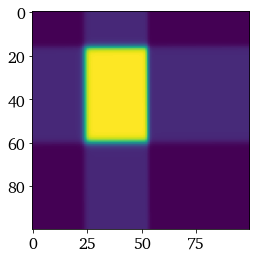

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

img    = [] # some array of images
frames = [] # for storing the generated images
fig    = plt.figure()


Nx      = 100
Ny      = 100

t0      = 0.
tEnd    = 10.
Nt      = 20
    
tVec    = np.linspace(t0,tEnd,Nt)
for it, t in enumerate(tVec):
    print('t=',t)
     
    if (RotFlg == True):
        Theta = Theta0 + w_Theta*t
    else:
        Theta = Theta0
        
    if (TransFlg == True):
        Psi   = t*w_Psi
        cr    = ca * Psi
        cx    = cx0 + cr * np.cos(Psi)
        cy    = cy0 + cr * np.sin(Psi)  
    else:
        cx    = 0.
        cy    = 0.
        
    if (ScaleFlg == True):
        lx    = (np.cos(t/tEnd*360. / 180.*np.pi)+2.)*lx0
        ly    = (np.cos(t/tEnd*360. / 180.*np.pi)+2.)*ly0
    else:
        lx    = lx0*2 
        ly    = ly0*2 
    
    zz    = zz0 + t*v_zz

    InputPred = np.zeros((Nx*Ny,3))
    
    x    = np.linspace(xMin,xMax,Nx)
    y    = np.linspace(yMin,yMax,Ny)

    i    = 0
    for ix, x_ in enumerate(x):
        for iy, y_ in enumerate(y):
            xrot_      = x_*np.cos(Theta) + y_*np.sin(Theta)
            yrot_      = x_*np.sin(Theta) - y_*np.cos(Theta)

            zx         = np.tanh((xrot_-cx+lx/2)*10.) - np.tanh((xrot_-cx-lx/2)*10.)
            zy         = np.tanh((yrot_-cy+ly/2)*10.) - np.tanh((yrot_-cy-ly/2)*10.)  
                        
            InputPred[i,0] = t
            InputPred[i,1] = x_
            InputPred[i,2] = y_

            i+=1
            
    InputPred = pd.DataFrame(InputPred, columns=['t','x','y'])
    yMat      = model.predict(InputPred)
    
    
    frames.append([plt.imshow((yMat).reshape(Nx,Ny),animated=True)])
    
ani = animation.ArtistAnimation(fig, frames, interval=5000, blit=True, repeat_delay=50000)
writergif = animation.PillowWriter(fps=30)
ani.save(path_to_run_fld+'/Figures/Video.gif',writer=writergif)

## Plotting Loss Histories

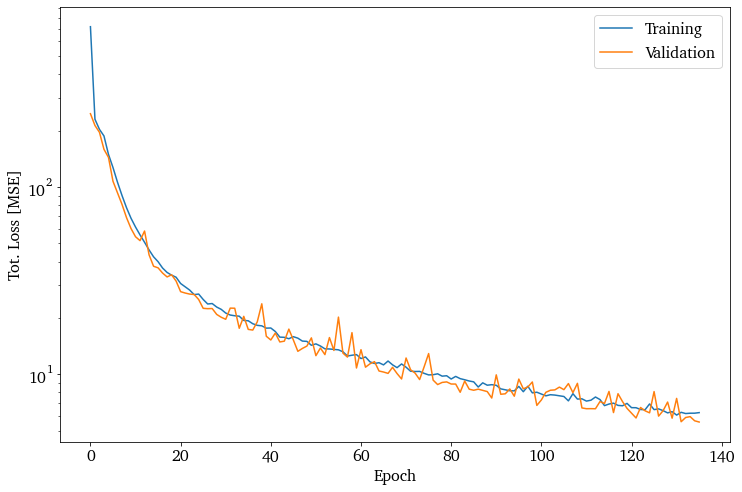

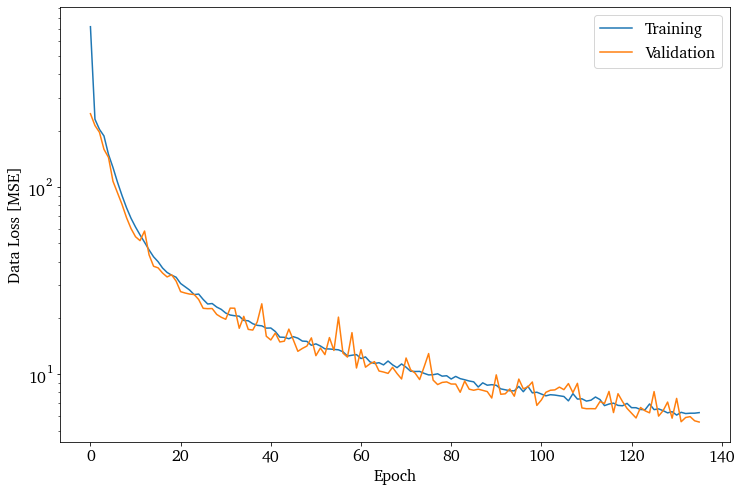

In [10]:
Data = pd.read_csv(path_to_run_fld+'/Training/History.csv')

fig  = plt.figure(figsize=(12,8))
plt.plot(Data['tot_loss'],     label='Training')
plt.plot(Data['val_tot_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Tot. Loss [MSE]')
plt.legend()
plt.yscale('log')


fig  = plt.figure(figsize=(12,8))
plt.plot(Data['pts_loss'],     label='Training')
plt.plot(Data['val_pts_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Data Loss [MSE]')
plt.legend()
plt.yscale('log')
#plt.ylim([1.e-2, 1.e0])

# fig  = plt.figure(figsize=(12,8))
# plt.plot(Data['res_loss'],     label='Training')
# plt.plot(Data['val_res_loss'], label='Validation')
# plt.xlabel('Epoch')
# plt.ylabel('Residual Loss [MSE]')
# plt.legend()
# plt.yscale('log')

# fig  = plt.figure(figsize=(12,8))
# plt.plot(Data['ics_loss'],     label='Training')
# plt.plot(Data['val_ics_loss'], label='Validation')
# plt.xlabel('Epoch')
# plt.ylabel('I.C.s Loss [MSE]')
# plt.legend()
# plt.yscale('log')

## Evaluating Trunk

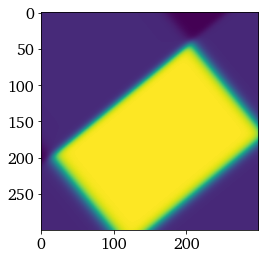

In [11]:
Nx   = 300
Ny   = 300

x    = np.linspace(xMin*2,xMax*2,Nx)
y    = np.linspace(yMin*2,yMax*2,Ny)

InputData = np.zeros((Nx*Ny,2))
i         = 0
for ix in range(Nx):
    x_ = x[ix]
    for iy in range(Ny):
        InputData[i,0] = x_
        InputData[i,1] = y[iy]
        i+=1

output_trunk = model.net.system_of_components['DeepONet'].components['Trunk'].call(InputData, model.net.layers_dict, None, None, None, training=False)

Mode = np.zeros((Nx,Ny))
i    = 0
for ix in range(Nx):
    for iy in range(Ny):
        Mode[ix,iy] = output_trunk[i,0]
        i+=1
        
plt.imshow(Mode)

## Evaluating Rigid Block

In [12]:
plt.figure()

tVec = np.linspace(0,10,100)[...,np.newaxis]

output_1 = model.net.system_of_components['DeepONet'].components['Rigid'].call(tVec, model.net.layers_dict, None, None, None, training=False)

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Scaling')

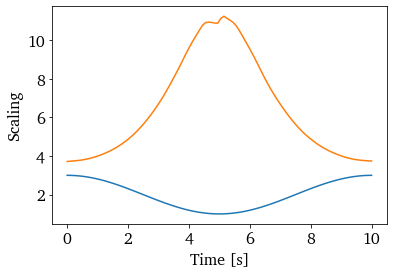

In [13]:
tEnd  = 10.
lx    = (np.cos(tVec/tEnd*360. / 180.*np.pi)+2)
    
plt.plot(tVec,lx)

plt.plot(tVec, output_1[:,2])

plt.xlabel('Time [s]')
plt.ylabel(r'Scaling')

Text(0, 0.5, '$\\theta$ [deg]')

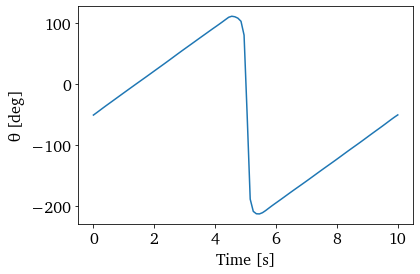

In [14]:
plt.plot(tVec, output_1[:,3]/np.pi*180.)
plt.xlabel('Time [s]')
plt.ylabel(r'$\theta$ [deg]')

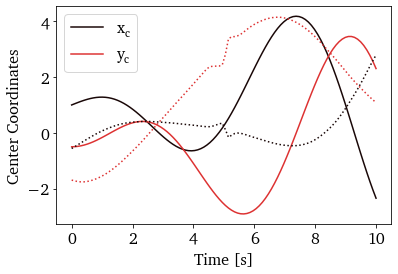

In [15]:
Psi   = tVec*w_Psi
cr    = ca * Psi
cx    = cx0 + cr * np.cos(Psi)
cy    = cy0 + cr * np.sin(Psi)  
plt.plot(tVec, cx, '-', color=ColorVec[0], label='$x_c$')
plt.plot(tVec, cy, '-', color=ColorVec[1], label='$y_c$')

sca   = 1#-output_1[:,3]
plt.plot(tVec, output_1[:,0]*sca, ':', color=ColorVec[0], label=None)
plt.plot(tVec, output_1[:,1]*sca, ':', color=ColorVec[1], label=None)

plt.xlabel('Time [s]')
plt.ylabel(r'Center Coordinates')
plt.legend()

No handles with labels found to put in legend.


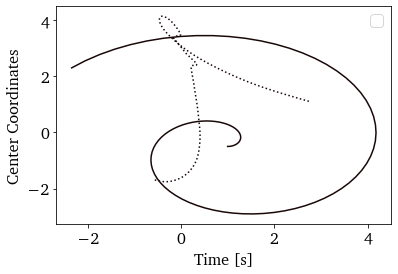

In [16]:
Psi   = tVec*w_Psi
cr    = ca * Psi
cx    = cx0 + cr * np.cos(Psi)
cy    = cy0 + cr * np.sin(Psi)  

sca   = 1#-1/output_1[:,3]
plt.plot(cx, cy, '-', color=ColorVec[0], label=None)
plt.plot(output_1[:,0]*sca, output_1[:,1]*sca, ':', color=ColorVec[0], label=None)


plt.xlabel('Time [s]')
plt.ylabel(r'Center Coordinates')
plt.legend()